# **Simulación del Modelo de Ising**
## Problema Obligatorio 2
### Física Computacional - 2025

---

**Autores:**
- Irene Blanco Ramos
- Luna González Silva
- Teresa González Silva

**Fecha:** 8 de mayo de 2025

---
# Índice

1. [Temperatura 1.5 K. Configuración aleatoria](#temperatura-15-k-configuracion-aleatoria)
2. [Temperatura 3 K. Configuración ordenada](#temperatura-3-k-configuracion-ordenada)
3. [Temperatura 2 K. Configuración aleatoria](#temperatura-2-k-configuracion-aleatoria)
4. [Temperatura crítica](#temperatura-critica)

---

# Temperatura 1.5 K. Configuración aleatoria
### Coste computacional: evaluación del tiempo de ejecución en función de $N$

| Ordenador    | Procesador     |
|---------------|---------------|
|Irene |11th Gen Intel(R) Core(TM) i5-1135G7 @ 2.40GHz, 2419 Mhz, 4 procesadores principales, 8 procesadores lógicos|
| Teresa |  |



| Pasos Monte Carlo $100N^2$ | Ordenador Teresa (s) | Ordenador Irene (s) | Joel (s) |
|----------------------------|-----------------------|----------------------|----------|
| $100 \times 10^2 = 10000$  | 0.02                  | 0.01                 |     |
| $100 \times 20^2 = 40000$  | 0.07                  | 0.05                 |     |
| $100 \times 30^2 = 90000$  | 0.22                  | 0.14                 |      |
| $100 \times 40^2 = 160000$ | 0.47                  | 0.30                 |     |
| $100 \times 50^2 = 250000$ | 0.82                  | 0.60                |     |
| $100 \times 60^2 = 360000$ | 1.36                  | 1.09                 |      |
| $100 \times 70^2 = 490000$ | 2.0                   | 1.69                 |      |
| $100 \times 80^2 = 640000$ | 3.54                  | 2.40                 |     |
| $100 \times 90^2 = 810000$ | 5.19                  | 3.47                 |    |
| $100 \times 100^2 = 1000000$| 11.01                 | 4.98                |      |
| $100 \times 110^2 = 1210000$| 13.27                 | 6.58                 |      |
| $100 \times 120^2 = 1440000$| 18.07                 | 8.62                 |      |
| $100 \times 130^2 = 1690000$| 20.27                 | 11.01                 |    |
| $100 \times 140^2 = 1960000$| 24.28                 |  13.81                |    |
| $100 \times 150^2 = 2250000$| 33.10             |  17.42                |    |
| $100 \times 160^2 = 2560000$| 37.38              |  22.57              |    |
| $100 \times 170^2 = 2890000$| 45.42                 |  25.22               |    |
| $100 \times 180^2 = 3240000$| 56.40                 |  30.13              |    |
| $100 \times 190^2 = 3610000$| 69.55                 |  35.91               |    |
| $100 \times 200^2 = 4000000$| 80.64                 |  42.09               |    |

Parámetros del ajuste para Ordenador Teresa:
a = 2.1551e-03, b = -2.0807e-01, c = 4.2100e+00
Parámetros del ajuste paraOrdenador Irene:
a = 1.6940e-03, b = -1.5150e-01, c = 3.0023e+00


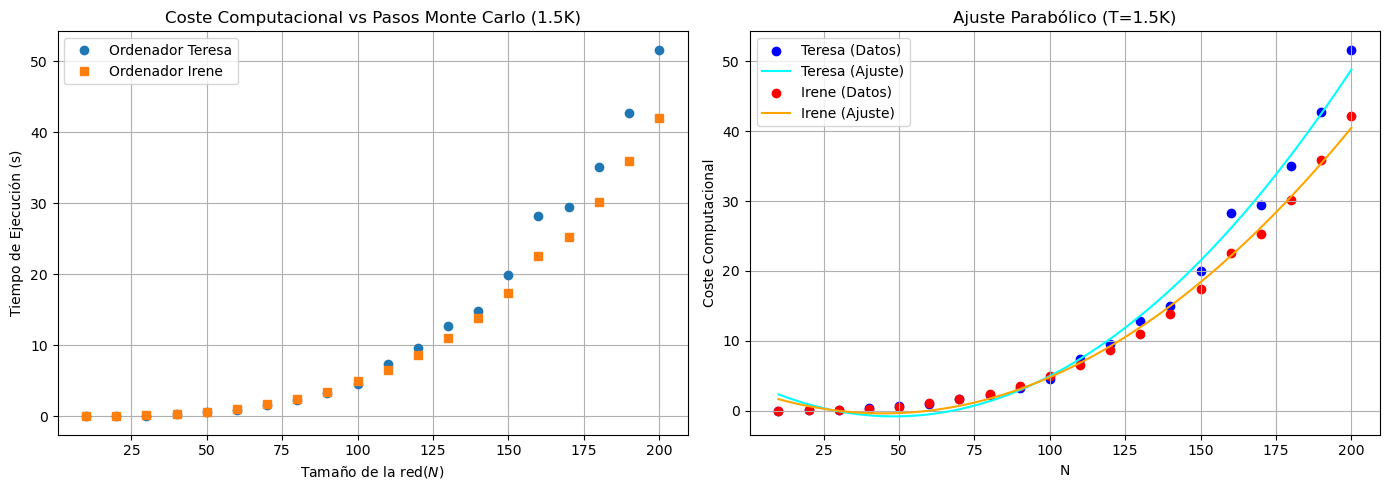

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de los pasos Monte Carlo y tiempos de ejecución
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
teresa_times = [0.02, 0.05, 0.13, 0.36, 0.63, 0.94, 1.61, 2.25, 3.32, 4.57, 7.42, 9.59, 12.80, 14.92, 19.98, 28.26, 29.48, 35.06, 42.73, 51.65]
irene_times = [0.01, 0.05, 0.14, 0.30, 0.60, 1.09, 1.69, 2.40, 3.47, 4.98, 6.58, 8.62, 11.01, 13.81, 17.42, 22.57, 25.22, 30.13, 35.91, 42.09]

# Para el ajuste parabólico
coste_computacional_1 = teresa_times
coste_computacional_2 = irene_times

def modelo_parabolico(x, a, b, c):
    return a * x**2 + b * x + c

params_1, _ = curve_fit(modelo_parabolico, N, coste_computacional_1)
a1, b1, c1 = params_1

params_2, _ = curve_fit(modelo_parabolico, N, coste_computacional_2)
a2, b2, c2 = params_2

x_fit = np.linspace(min(N), max(N), 500)
y_fit_1 = modelo_parabolico(x_fit, a1, b1, c1)
y_fit_2 = modelo_parabolico(x_fit, a2, b2, c2)

# Mostrar los parámetros del ajuste
print("Parámetros del ajuste para Ordenador Teresa:")
print(f"a = {a1:.4e}, b = {b1:.4e}, c = {c1:.4e}")
print("Parámetros del ajuste paraOrdenador Irene:")
print(f"a = {a2:.4e}, b = {b2:.4e}, c = {c2:.4e}")

# Crear dos subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Datos originales
axs[0].plot(N, teresa_times, label="Ordenador Teresa", marker='o', linestyle='')
axs[0].plot(N, irene_times, label="Ordenador Irene", marker='s', linestyle='')
axs[0].set_title("Coste Computacional vs Pasos Monte Carlo (1.5K)")
axs[0].set_xlabel("Tamaño de la red($N$)")
axs[0].set_ylabel("Tiempo de Ejecución (s)")
axs[0].legend()
axs[0].grid(True)

# Gráfica 2: Ajuste parabólico
axs[1].scatter(N, coste_computacional_1, label="Teresa (Datos)", color="blue")
axs[1].plot(x_fit, y_fit_1, label=f"Teresa (Ajuste)", color="cyan")
axs[1].scatter(N, coste_computacional_2, label="Irene (Datos)", color="red")
axs[1].plot(x_fit, y_fit_2, label=f"Irene (Ajuste)", color="orange")
axs[1].set_xlabel("N")
axs[1].set_ylabel("Coste Computacional")
axs[1].set_title("Ajuste Parabólico (T=1.5K)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Temperatura 3 K. Configuración ordenada

##### Coste computacional: evaluación del tiempo de ejecución en función de $N^2$

| Pasos Monte Carlo $100N^2$ | Ordenador Teresa (s) | Ordenador Irene (s) | Joel (s) |
|----------------------------|-----------------------|----------------------|----------|
| $100 \times 10^2 = 10000$  | 0.01                 |  0.01                |     |
| $100 \times 20^2 = 40000$  | 0.03                 |  0.04                |     |
| $100 \times 30^2 = 90000$  | 0.06                  |  0.10               |      |
| $100 \times 40^2 = 160000$ | 0.07                 |  0.18               |     |
| $100 \times 50^2 = 250000$ | 0.11                  |  0.26                |     |
| $100 \times 60^2 = 360000$ | 0.21                 |  0.41                |      |
| $100 \times 70^2 = 490000$ | 0.30                  | 0.59                |      |
| $100 \times 80^2 = 640000$ | 0.44                 |  0.77               |     |
| $100 \times 90^2 = 810000$ | 0.64                  |  1.13              |     |
| $100 \times 100^2 = 1000000$| 0.85                |  1.34              |      |
| $100 \times 110^2 = 1210000$| 1.01                |  1.74               |      |
| $100 \times 120^2 = 1440000$| 1.31                 |  2.01               |      |
| $100 \times 130^2 = 1690000$| 1.68                 |  2.72               |    |
| $100 \times 140^2 = 1960000$| 1.98                |  3.10                |    |
| $100 \times 150^2 = 2250000$| 2.55                 |  3.40                |    |
| $100 \times 160^2 = 2560000$| 3.09                 |  4.31              |    |
| $100 \times 170^2 = 2890000$| 3.71                 |  5.20               |    |
| $100 \times 180^2 = 3240000$| 4.33                 |  5.67              |    |
| $100 \times 190^2 = 3610000$| 5.09                 |  6.81               |    |
| $100 \times 200^2 = 4000000$| 6.38                 |  7.67               |    |

Parámetros del ajuste para Ordenador Teresa (3K):
a = 2.4292e-04, b = -2.1510e-02, c = 4.6517e-01
Parámetros del ajuste para Ordenador Irene (3K):
a = 2.5752e-04, b = -1.5638e-02, c = 3.1963e-01


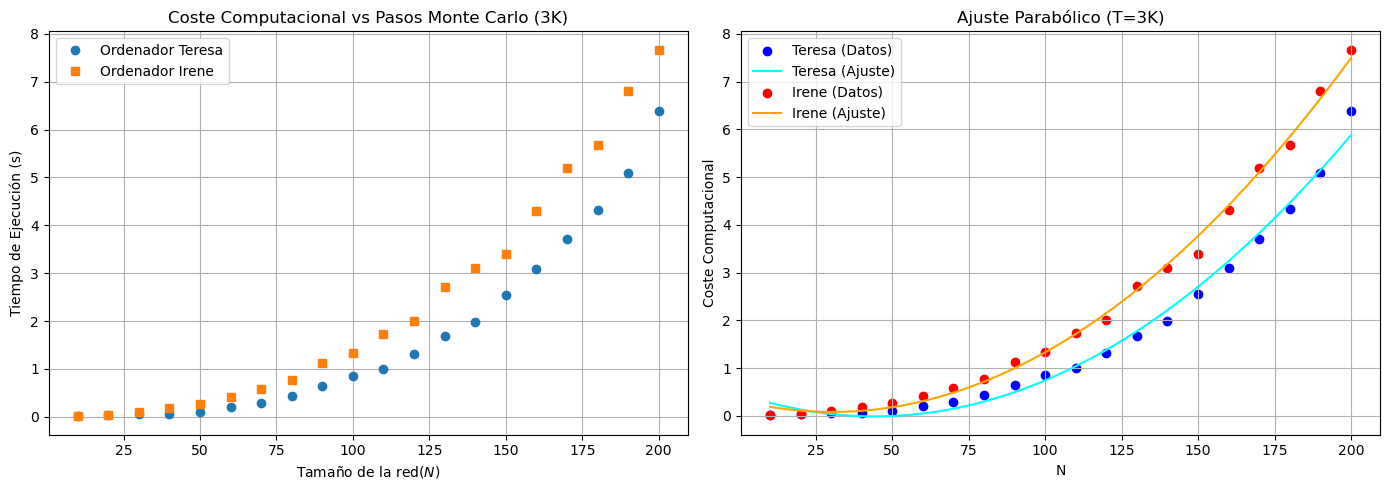

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de los pasos Monte Carlo y tiempos de ejecución para 3K
N = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
teresa_times = [0.01, 0.03, 0.06, 0.07, 0.11, 0.21, 0.30, 0.44, 0.64, 0.85, 1.01, 1.31, 1.68, 1.98, 2.55, 3.09, 3.71, 4.33, 5.09, 6.38]
irene_times = [0.01, 0.04, 0.10, 0.18, 0.26, 0.41, 0.59, 0.77, 1.13, 1.34, 1.74, 2.01, 2.72, 3.10, 3.40, 4.31, 5.20, 5.67, 6.81, 7.67]

# Para el ajuste parabólico
coste_computacional_1 = teresa_times
coste_computacional_2 = irene_times

def modelo_parabolico(x, a, b, c):
    return a * x**2 + b * x + c

params_1, _ = curve_fit(modelo_parabolico, N, coste_computacional_1)
a1, b1, c1 = params_1

params_2, _ = curve_fit(modelo_parabolico, N, coste_computacional_2)
a2, b2, c2 = params_2

x_fit = np.linspace(min(N), max(N), 500)
y_fit_1 = modelo_parabolico(x_fit, a1, b1, c1)
y_fit_2 = modelo_parabolico(x_fit, a2, b2, c2)

# Mostrar los parámetros del ajuste
print("Parámetros del ajuste para Ordenador Teresa (3K):")
print(f"a = {a1:.4e}, b = {b1:.4e}, c = {c1:.4e}")
print("Parámetros del ajuste para Ordenador Irene (3K):")
print(f"a = {a2:.4e}, b = {b2:.4e}, c = {c2:.4e}")

# Crear dos subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Datos originales
axs[0].plot(N, teresa_times, label="Ordenador Teresa", marker='o', linestyle='')
axs[0].plot(N, irene_times, label="Ordenador Irene", marker='s', linestyle='')
axs[0].set_title("Coste Computacional vs Pasos Monte Carlo (3K)")
axs[0].set_xlabel("Tamaño de la red($N$)")
axs[0].set_ylabel("Tiempo de Ejecución (s)")
axs[0].legend()
axs[0].grid(True)

# Gráfica 2: Ajuste parabólico
axs[1].scatter(N, coste_computacional_1, label="Teresa (Datos)", color="blue")
axs[1].plot(x_fit, y_fit_1, label=f"Teresa (Ajuste)", color="cyan")
axs[1].scatter(N, coste_computacional_2, label="Irene (Datos)", color="red")
axs[1].plot(x_fit, y_fit_2, label=f"Irene (Ajuste)", color="orange")
axs[1].set_xlabel("N")
axs[1].set_ylabel("Coste Computacional")
axs[1].set_title("Ajuste Parabólico (T=3K)")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()